In [4]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

The ‘Wholesale Customer data’ dataset is imported in python to analyze the spend under each store
items across regions and channel to find solutions to each problem. Below is the detailed approach and
answer.


In [16]:
df= pd.read_csv('C:/Users/amvi/Downloads/Wholesale+Customers+Data.csv')

In [17]:
df

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1.00,Retail,Other,12669,9656,7561,214,2674,1338
1,2.00,Retail,Other,7057,9810,9568,1762,3293,1776
2,3.00,Retail,Other,6353,8808,7684,2405,3516,7844
3,4.00,Hotel,Other,13265,1196,4221,6404,507,1788
4,5.00,Retail,Other,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...,...
436,437.00,Hotel,Other,39228,1431,764,4510,93,2346
437,438.00,Retail,Other,14531,15488,30243,437,14841,1867
438,439.00,Hotel,Other,10290,1981,2232,1038,168,2125
439,440.00,Hotel,Other,2787,1698,2510,65,477,52


A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

In [4]:

# To summarize our data we use info function.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
Buyer/Spender       440 non-null int64
Channel             440 non-null object
Region              440 non-null object
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicatessen        440 non-null int64
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [52]:
# by using isnull().sum() we came to infer that our data do not have any nul values.
df.isnull().sum()

Buyer/Spender        1
Channel              1
Region               1
Fresh                0
Milk                 0
Grocery              0
Frozen               0
Detergents_Paper     0
Delicatessen         0
Total Expenditure    0
dtype: int64

The given data has 440 rows and 9 columns with no null values. 

Out of 9 columns 6 are the category of products/items across 3 regions (Lisbon, Oporto, Other) and   across 2 different sales channel (Hotel, Retail ).
Where Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen  are continuous in nature  and Channel ,Region are nominal in nature. Among Channels, the most frequently occurring, 298 0ut of 440 is  ‘Hotel’ and a


In [25]:
df['Total Expenditure'] = df['Fresh']+ df['Milk']+df['Grocery']+df['Frozen']+df['Detergents_Paper']+df['Delicatessen']
df


,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total Expenditure
0,1.00,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2.00,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3.00,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4.00,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5.00,Retail,Other,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...,...
436,437.00,Hotel,Other,39228,1431,764,4510,93,2346,48372
437,438.00,Retail,Other,14531,15488,30243,437,14841,1867,77407
438,439.00,Hotel,Other,10290,1981,2232,1038,168,2125,17834
439,440.00,Hotel,Other,2787,1698,2510,65,477,52,7589


In [63]:
df_region = df.groupby('Region')['Total Expenditure'].sum()
print(df_region)
print()
df_channel = df.groupby('Channel')['Total Expenditure'].sum()
print(df_channel)

Region
Lisbon     2386813
Oporto     1555088
Other     10677599
Name: Total Expenditure, dtype: int64

Channel
Hotel     7999569
Retail    6619931
Name: Total Expenditure, dtype: int64


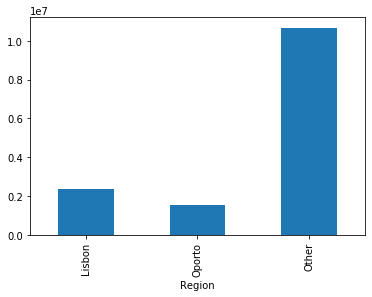

In [31]:
df_region.plot(kind = 'bar')
plt.show()

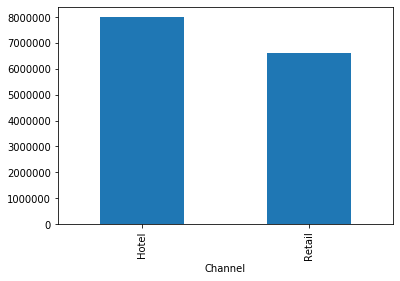

In [32]:
df_channel.plot(kind = 'bar')
plt.show()

By creating a new column of ‘Total Expenditure’ and plotting bar graph with Region and Channel we can identify region as well as channel with maximum spend and minimum spend. Below is the bar graph representation 
Hotel spend amount is highest with 7999569 PTE (Portuguese Escudo i.e Portuguese currency) spend amount and Retail spend amount is the least with 6619931 PTE spend amount based on Channel.
Other region spend amount is highest with the highest spend amount of 10677599 PTE and Oporto is the least spending region with lowest spend amount of 1555088 PTE.


1.2. There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.



In [53]:
#we use describe function to infer behavior in different items
df.describe(include='all')

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total Expenditure
count,440.00,440,440,441.00,441.00,441.00,441.00,441.00,441.00,441.00
unique,nan,2,3,nan,nan,nan,nan,nan,nan,nan
top,nan,Hotel,Other,nan,nan,nan,nan,nan,nan,nan
freq,nan,298,316,nan,nan,nan,nan,nan,nan,nan
mean,220.50,NaN,NaN,12003.49,5825.34,7972.37,3074.41,2890.40,1543.23,33309.24
std,127.16,NaN,NaN,12633.13,7397.23,9502.68,4849.43,4766.10,2843.15,26384.12
min,1.00,NaN,NaN,3.00,55.00,3.00,25.00,3.00,3.00,904.00
25%,110.75,NaN,NaN,3136.00,1534.00,2155.00,744.00,257.00,409.00,17460.00
50%,220.50,NaN,NaN,8533.00,3634.00,4757.00,1535.00,820.00,967.00,27559.00
75%,330.25,NaN,NaN,16933.00,7209.00,10685.00,3570.00,3961.00,1824.00,41795.00




Fresh has a mean of 12000.3, standard deviation of 12633.13, with min value of 3 and max value of 112151.The quartile ranges are Q1(25%) is 3136.00, Q2(50%) is 8533 and  Q3(75%) is 16933.00 with IQR = Q3-Q1 = 16933.8-3136.00 = 13,797.8

Milk has a mean of 5825.34, standard deviation of 7397.23, with min value of 55 and max value of 73498.The quartile ranges are Q1(25%) is 1534.00, Q2(50%) 3634.00 and Q3(75%) is 7209.00 with IQR = Q3-Q1 = 7209.00-1534.00 = 5,675.00

Grocery has a mean of 7972.37, standard deviation of 9502.68, with min value of 3 and max value of 92780.The quartile ranges are Q1(25%) is 2155.00, Q2(50%) 4757.00 and Q3(75%) is 10685.00 with IQR = Q3-Q1 = 10685.00-2155.00 = 8,530.00

Frozen has a mean of 3074.41, standard deviation of 4849.43, with min value of 25 and max value of 60869.The quartile ranges are Q1(25%) is 744.00, Q2(50%) 1535.00 and Q3(75%) is 3570.00 with IQR = Q3-Q1 = 3570.00-744.00 = 2,826.00

Detergents_Paper has a mean of 2890.40, standard deviation of 4766.10, with min value of 3 and max value of 40827.The quartile ranges are Q1(25%) is 257.00, Q2(50%) is 820.00 and Q3(75%) is 3961.00 with IQR = Q3-Q1 = 3961.00-257.00 = 3,704.00


Delicatessen has a mean of 1543.23	, standard deviation of 2843.15, with min value of 3 and max value of 47943.The quartile ranges are Q1(25%) is 409.00, Q2(50%) is 967.00 and Q3(75%) is 1824.00 with IQR = Q3-Q1 = 1824.00-409.00 = 1,415.00



In [46]:
df.groupby('Channel')['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen'].sum()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,,,,,,
Hotel,4015717,1028614,1180717,1116979,235587,421955
Retail,1264414,1521743,2317845,234671,1032270,248988


In [48]:
df.groupby('Region')['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen'].sum()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Region,,,,,,
Lisbon,854833,422454,570037,231026,204136,104327
Oporto,464721,239144,433274,190132,173311,54506
Other,3960577,1888759,2495251,930492,890410,512110


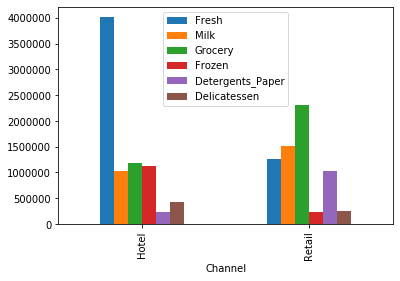

In [50]:
df.groupby('Channel')['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen'].sum().plot(kind='bar')

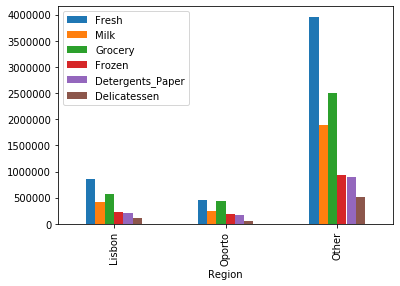

In [54]:
df.groupby('Region')['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen'].sum().plot(kind='bar')

From the above bar plots we could infer that category like Fresh, Frozen, Grocery have higher spend in Hotel and Grocery, Milk, Fresh , Detergents Paper have higher spend in the Retail channel across regions. On the other hand, Fresh and Grocery have higher consumption in the Hotel channel versus Retail, across all regions.

1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [37]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(df.Fresh),stats.skew(df.Milk),stats.skew(df.Grocery),stats.skew(df.Frozen),stats.skew(df.Detergents_Paper),stats.skew(df.Delicatessen)]},
                        index=['Fresh', 'Milk', 'Grocery',
       'Frozen', 'Detergents_Paper', 'Delicatessen'])  # Measure the skeweness of the required columns
Skewness

,Skewness
Fresh,2.55
Milk,4.04
Grocery,3.58
Frozen,5.89
Detergents_Paper,3.62
Delicatessen,11.11


1.3 On the basis of the descriptive measure of variability, which item shows the most inconsistent behaviour? Which items shows the least inconsistent behaviour?

In [105]:

print(df.std())


Buyer/Spender         127.16
Fresh               12647.33
Milk                 7380.38
Grocery              9503.16
Frozen               4854.67
Detergents_Paper     4767.85
Delicatessen         2820.11
Total Expenditure   26356.30
dtype: float64


In [38]:
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total Expenditure
0,1.00,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2.00,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3.00,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4.00,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5.00,Retail,Other,22615,5410,7198,3915,1777,5185,46100


In [29]:
cv = lambda x: np.std(x, ddof=1) / np.mean(x) * 100 

In [30]:
cv_fresh=cv(df['Fresh'])
print (cv_fresh)

105.24541211935197


In [33]:
cv_milk=cv(df['Milk'])
print (cv_milk)

126.98359099878576


In [37]:
cv_grocery=cv(df['Grocery'])
print (cv_grocery)

119.19526230196634


In [40]:
cv_frozen=cv(df['Frozen'])
print (cv_frozen)

157.73517714274698


In [42]:
cv_detergent_paper=cv(df['Detergents_Paper'])
print (cv_detergent_paper)

164.89433004536804


In [44]:
cv_delicatessen=cv(df['Delicatessen'])
print (cv_delicatessen)

184.23430105786645


Coefficient of Variation for Fresh is 1.0524541211935197

Coefficient of Variation for Milk is 1.2698359099878576

Coefficient of Variation for Grocery is 1.1919526230196634

Coefficient of Variation for Frozen is 1.5773517714274698

Coefficient of Variation for Detergents_Paper is 1.6489433004536804

Coefficient of Variation for Delicatessen is 1.8423430105786645

Using Coefficient of Variation we observe that the least value is of “Fresh” (1.05) and highest value is of “Delicatessen” (1.84).So by obserbing the values of Coefficient of Variation we can say that the most inconsistent behavior is shown by  Delicatessen and the least inconsistent behavior is shown by Fresh.





1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

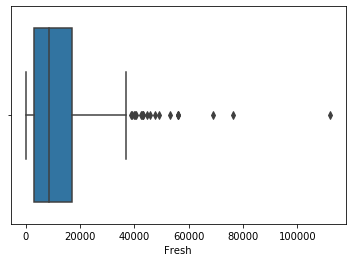

In [36]:
sns.boxplot(x =df['Fresh'])
figsize=(40,35)

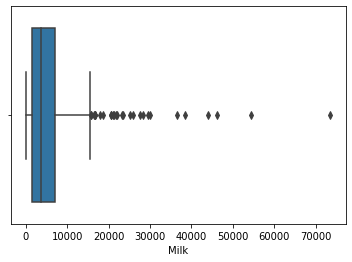

In [99]:
sns.boxplot(x =df['Milk'])

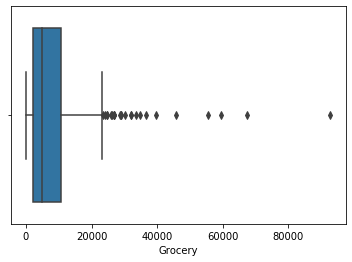

In [100]:
sns.boxplot(x =df['Grocery'])

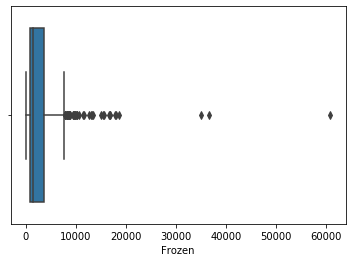

In [101]:
sns.boxplot(x =df['Frozen'])

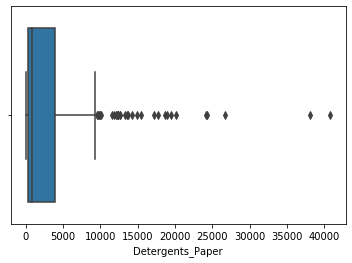

In [102]:
sns.boxplot(x =df['Detergents_Paper'])

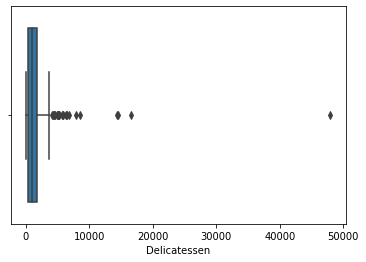

In [116]:
sns.boxplot(x =df['Delicatessen'])

From the above boxplots we could analyse that all the six items have outliers.

1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective

As per the data analysis, I could state that there are inconsistencies in spending of different items (by calculating Coefficient of Variation), which should be minimized as it may affect the business flow. The spending scenario of Hotel and Retail channel are varying which should be uniform or more or less equal for unwrinkled flow of the retail business. Effort must be taken to spend more in  Milk , Frozen , Detergent Paper and Delicatessen as they are the least spend items across the region.



Problem 2 - (Download Data)

The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).

In [55]:
df= pd.read_csv('C:\\Users\\amvi\\Downloads\\Survey-1.csv')
df

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.90,Full-Time,50.00,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.60,Part-Time,25.00,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.50,Part-Time,45.00,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.50,Full-Time,40.00,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.80,Unemployed,40.00,2,4,500,Laptop,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,Female,21,Senior,International Business,No,2.40,Part-Time,40.00,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.90,Part-Time,40.00,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.50,Part-Time,55.00,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.50,Part-Time,30.00,2,3,490,Laptop,50


The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).

2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

2.1.1. Gender and Major

2.1.2. Gender and Grad Intention

2.1.3. Gender and Employment

2.1.4. Gender and Computer

In [56]:
df_crosstab = pd.crosstab(df['Gender'], df['Major'], 
                               margins = False)
print(df_crosstab)

Major   Accounting  CIS  Economics/Finance  International Business  \
Gender                                                               
Female           3    3                  7                       4   
Male             4    1                  4                       2   

Major   Management  Other  Retailing/Marketing  Undecided  
Gender                                                     
Female           4      3                    9          0  
Male             6      4                    5          3  


In [57]:
df_crosstab = pd.crosstab(df['Gender'], df['Grad Intention'], 
                               margins = False)
print(df_crosstab)

Grad Intention  No  Undecided  Yes
Gender                            
Female           9         13   11
Male             3          9   17


In [58]:
df_crosstab = pd.crosstab(df['Gender'], df['Employment'], 
                               margins = False)
print(df_crosstab)

Employment  Full-Time  Part-Time  Unemployed
Gender                                      
Female              3         24           6
Male                7         19           3


In [59]:
df_crosstab = pd.crosstab(df['Gender'], df['Computer'], 
                               margins = False)
print(df_crosstab)

Computer  Desktop  Laptop  Tablet
Gender                           
Female          2      29       2
Male            3      26       0


2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.2.1. What is the probability that a randomly selected CMSU student will be male?

2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [60]:
#2.2.1
Total_Male=29
Total_Students=62
Prob_Male = round(Total_Male/Total_Students,4)*100
print('the probability that a randomly selected CMSU student will be male. is %1.1f' % Prob_Male +'%')

the probability that a randomly selected CMSU student will be male. is 46.8%


In [61]:
#2.2.2
Total_Female=33
Total_Students=62
Prob_Female = round(Total_Female/Total_Students,4)*100
print('the probability that a randomly selected CMSU student will be female. is %1.1f' % Prob_Female +'%')

the probability that a randomly selected CMSU student will be female. is 53.2%


2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.3.1. Find the conditional probability of different majors among the male students in CMSU.

2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [62]:
df_crosstab = pd.crosstab(df['Gender'], df['Major'], 
                               margins = False)
print(df_crosstab)

Major   Accounting  CIS  Economics/Finance  International Business  \
Gender                                                               
Female           3    3                  7                       4   
Male             4    1                  4                       2   

Major   Management  Other  Retailing/Marketing  Undecided  
Gender                                                     
Female           4      3                    9          0  
Male             6      4                    5          3  


In [63]:
Male_Acc=4
Total_Male=29
Male_Accou = round(Male_Acc/Total_Male,4)*100
print('Total male opting Accounting major. is %1.1f' % Male_Accou +'%')

Total male opting Accounting major. is 13.8%


In [64]:
Male_CIS=1 
Total_Male=29
Male_CIS = round(Male_CIS/Total_Male,4)*100
print('Total male opting CIS major. is %1.1f' % Male_CIS +'%')

Total male opting CIS major. is 3.5%


In [65]:
Male_Ecofin=4
Total_Male=29
Male_Ecofin = round(Male_Ecofin/Total_Male,4)*100
print('Total male opting Economics/Finance major. is %1.1f' % Male_Ecofin +'%')

Total male opting Economics/Finance major. is 13.8%


In [66]:
Male_Intbuis=2
Total_Male=29
Male_Intbuis = round(Male_Intbuis/Total_Male,4)*100
print('Total male opting International Business. is %1.1f' % Male_Intbuis +'%')

Total male opting International Business. is 6.9%


In [67]:
Male_Manmnt=6
Total_Male=29
Male_Manmnt = round(Male_Manmnt/Total_Male,4)*100
print('Total male opting IManagement.is %1.1f' % Male_Manmnt +'%')

Total male opting IManagement.is 20.7%


In [68]:
Male_Others=4 
Total_Male=29
Male_Others = round(Male_Others/Total_Male,4)*100
print('Total male opting Others.is %1.1f' % Male_Others +'%')

Total male opting Others.is 13.8%


In [69]:
Male_Retmar=5
Total_Male=29
Male_Retmar = round(Male_Retmar/Total_Male,4)*100
print('Total male opting Retmar.is %1.1f' % Male_Retmar +'%')

Total male opting Retmar.is 17.2%


In [70]:
Male_Undecided =3
Total_Male=29
Male_Undecided  = round(Male_Undecided /Total_Male,4)*100
print('Total male still undicided.is %1.1f' % Male_Undecided  +'%')

Total male still undicided.is 10.3%


2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [71]:
df_crosstab = pd.crosstab(df['Gender'], df['Major'], 
                               margins = False)
print(df_crosstab)

Major   Accounting  CIS  Economics/Finance  International Business  \
Gender                                                               
Female           3    3                  7                       4   
Male             4    1                  4                       2   

Major   Management  Other  Retailing/Marketing  Undecided  
Gender                                                     
Female           4      3                    9          0  
Male             6      4                    5          3  


In [72]:
Female_Acc=3
Total_Female=33
Female_Acc = round(Female_Acc/Total_Female,4)*100
print('Total female opting Accounting major. is %1.1f' % Female_Acc +'%')

Total female opting Accounting major. is 9.1%


In [73]:
Female_CIS =3
Total_Female=33
Female_CIS  = round(Female_CIS /Total_Female,4)*100
print('Total female opting CIS  major. is %1.1f' % Female_CIS  +'%')

Total female opting CIS  major. is 9.1%


In [74]:
Female_Ecofin =7
Total_Female=33
Female_Ecofin  = round(Female_Ecofin /Total_Female,4)*100
print('Total female opting Economics/Finance  major. is %1.1f' % Female_Ecofin  +'%')

Total female opting Economics/Finance  major. is 21.2%


In [75]:
Female_Intbui=4
Total_Female=33
Female_Intbui  = round(Female_Intbui/Total_Female,4)*100
print('Total female opting International Business major. is %1.1f' % Female_Intbui  +'%')

Total female opting International Business major. is 12.1%


In [76]:
Female_Management=4
Total_Female=33
Female_Management  = round(Female_Management/Total_Female,4)*100
print('Total female opting Management major. is %1.1f' % Female_Management  +'%')

Total female opting Management major. is 12.1%


In [77]:
Female_Other=3
Total_Female=33
Female_Other  = round(Female_Other/Total_Female,4)*100
print('Total female opting Other majors. is %1.1f' % Female_Other  +'%')

Total female opting Other majors. is 9.1%


In [78]:
Female_Remar=9
Total_Female=33
Female_Remar = round(Female_Remar/Total_Female,4)*100
print('Total female opting Retailing/Marketing major. is %1.1f' % Female_Remar +'%')

Total female opting Retailing/Marketing major. is 27.3%


In [79]:
Female_Undecided=0
Total_Female=33
Female_Undecided  = round(Female_Undecided  /Total_Female,4)*100
print('Total female  yet Undecided their major. is %1.1f' % Female_Undecided   +'%')

Total female  yet Undecided their major. is 0.0%


2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop.

In [80]:
df_crosstab = pd.crosstab(df['Gender'], df['Grad Intention'], 
                               margins = False)
print(df_crosstab)

Grad Intention  No  Undecided  Yes
Gender                            
Female           9         13   11
Male             3          9   17


In [81]:
#Pr(randomly chosen student is a male | intends to graduate)
No_of_males_intends_to_graduate =17
Total_Male=62

Prob_Randomly_selected_candidate_is_a_male=round(No_of_males_intends_to_graduate/Total_Male,3)*100
print('randomly chosen student is a male and intends to graduate . is %1.1f' % Prob_Randomly_selected_candidate_is_a_male +'%')

randomly chosen student is a male and intends to graduate . is 27.4%


In [82]:
df_crosstab = pd.crosstab(df['Gender'], df['Computer'], 
                               margins = False)
print(df_crosstab)

Computer  Desktop  Laptop  Tablet
Gender                           
Female          2      29       2
Male            3      26       0


In [83]:
#P(A|B)=(randomly chosen student is a female | without a laptop)
No_of_females_without_laptop = 33-29
Total_Female=62

Prob_Randomly_selected_candidate_is_a_female=round(No_of_females_without_laptop/Total_Female,4)*100
print('the probability that a randomly selected student is a female and does NOT have a laptop. . is %1.1f' % Prob_Randomly_selected_candidate_is_a_female +'%')


the probability that a randomly selected student is a female and does NOT have a laptop. . is 6.5%


2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?

2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [84]:
df_crosstab = pd.crosstab(df['Gender'], df['Employment'], 
                               margins = False)
print(df_crosstab)

Employment  Full-Time  Part-Time  Unemployed
Gender                                      
Female              3         24           6
Male                7         19           3


In [85]:
#P(A|B)=( randomly chosen student is a male | or  has full-time employment)
Total_no_of_males = 29/62
Full_Employement= 10/62
Prob_male_fulltime=7/62

Prob_Randomly_selected_candidate_is_a_male=round(Total_no_of_males+Full_Employement-Prob_male_fulltime,4)*100
print('the probability that a randomly selected student is a male or has full-time employment. . is %1.1f' % Prob_Randomly_selected_candidate_is_a_male +'%')


the probability that a randomly selected student is a male or has full-time employment. . is 51.6%


2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [86]:
df_crosstab = pd.crosstab(df['Gender'], df['Major'], 
                               margins = False)
print(df_crosstab)

Major   Accounting  CIS  Economics/Finance  International Business  \
Gender                                                               
Female           3    3                  7                       4   
Male             4    1                  4                       2   

Major   Management  Other  Retailing/Marketing  Undecided  
Gender                                                     
Female           4      3                    9          0  
Male             6      4                    5          3  


In [87]:
#P(she is a female| majoring in international business or management.)


Total_Female_Major_IBM = 4+4
Total_Female = 33



Prob_female =round(Total_Female_Major_IBM/Total_Female ,4)*100
print('the probability that a randomly selected student is a female and majoring in international business or management . is %1.1f' % Prob_female +'%')



the probability that a randomly selected student is a female and majoring in international business or management . is 24.2%


2.6. Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [88]:
df_crosstab = pd.crosstab(df['Gender'], df['Grad Intention'],
                               margins = False)
print(df_crosstab )

Grad Intention  No  Undecided  Yes
Gender                            
Female           9         13   11
Male             3          9   17


In [89]:
df_crosstab[['No','Yes',]]

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17



Grad Intention	No 	Yes	Total
Gender			
Female	9	11	20
Male	3	17	20
Total	12	28	40
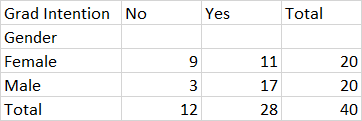


The Probability that a randomly selected student ‘being female’ and The Probability that a randomly selected student the graduate intention and being female are as follows:
P(Grad Intention Yes) = 28/40 = 0.7 
P(Grad Intention Yes | female) = 11 / 20 = 0.55 
These probabilities are not equal and one event doesn't change the probability of the occurrence of the other 
Event so we can tell that the two events are independent events.


2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.

Answer the following questions based on the data

2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

In [90]:
df_crosstab = pd.crosstab(df['Gender'], df['GPA'],
                               margins = False)
print(df_crosstab )

GPA     2.30  2.40  2.50  2.60  2.80  2.90  3.00  3.10  3.20  3.30  3.40  \
Gender                                                                     
Female     1     1     2     0     1     3     5     2     4     3     2   
Male       0     0     4     2     2     1     2     5     2     2     5   

GPA     3.50  3.60  3.70  3.80  3.90  
Gender                                
Female     4     1     2     1     1  
Male       2     2     0     0     0  


In [91]:
#p(GPA<3)

Total_GPA_Less_Than_Three = 17
Total_Students=62

Prob_GPA =round(Total_GPA_Less_Than_Three/Total_Students ,4)*100

print('Probability that that his/her GPA is less than 3. is %1.1f' % Prob_GPA +'%')

Probability that that his/her GPA is less than 3. is 27.4%


In [92]:
#p(Salary>=50 | Male)
Total_Salary_Greater_Fifty_Male = 4+1+1+3+3+1+0+0+1
Total_Male=29

Prob_Male =round(Total_Salary_Greater_Fifty_Male/Total_Male ,4)*100

print('randomly selected male earns 50 or more. is %1.1f' % Prob_Male +'%')

#p(Salary>=50 | Female)
Total_Salary_Greater_Fifty_Female = 5+0+0+5+5+0+1+1+1
Total_Female=33

Prob_Female =round(Total_Salary_Greater_Fifty_Female/Total_Female ,4)*100

print('randomly selected female earns 50 or more. is %1.1f' % Prob_Female +'%')

randomly selected male earns 50 or more. is 48.3%
randomly selected female earns 50 or more. is 54.5%


2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

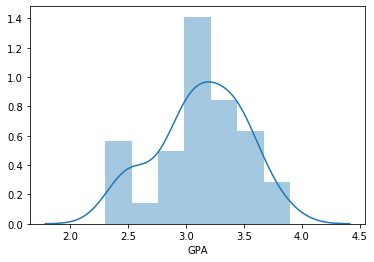

In [93]:
sns.distplot(df['GPA'])

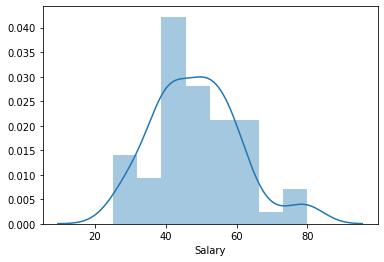

In [94]:
sns.distplot(df['Salary'])

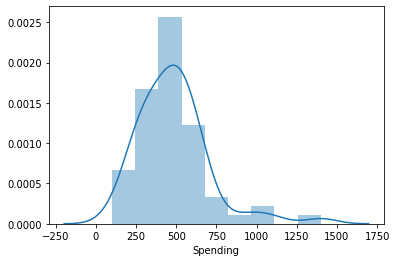

In [95]:
sns.distplot(df['Spending'])

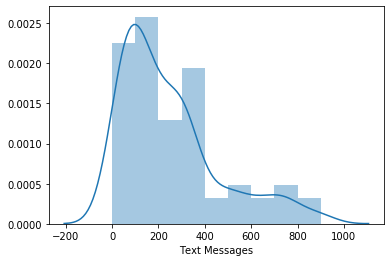

In [96]:
sns.distplot(df['Text Messages'])

From the above plots we can infer that GPA and Salary are normally distributed as both the data are forming bell shape where as in Spending and Text messages are moderatele  right skewed.

An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging. In some cases, excessive moisture can cause the granules attached to the shingles for texture and coloring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet are calculated. The company would like to show that the mean moisture content is less than 0.35 pounds per 100 square feet.





In [97]:
df= pd.read_csv('C:\\Users\\amvi\\Downloads\\A+&+B+shingles.csv')
df

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37
5,0.24,0.18
6,0.16,0.42
7,0.20,0.58
8,0.20,0.25
9,0.20,0.41


3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all step

In [98]:
t_statistic, p_value = stats.ttest_1samp(df.A, 0.35)
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value/2))


One sample t test 
t statistic: -1.4735046253382782 p value: 0.07477633144907513 


Since pvalue > 0.05, we do not reject H0 . There is not enough evidence to conclude that the mean moisture
content for Sample A shingles is less than 0.35 pounds per 100 square feet as  p-value = 0.0748. 

In [99]:
t_statistic, p_value =stats. ttest_1samp(df.B, 0.35,nan_policy='omit' )
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value/2))


One sample t test 
t statistic: -3.1003313069986995 p value: 0.0020904774003191826 


Since pvalue < 0.05, reject H0 . There is enough evidence to conclude that the mean moisture content for
Sample B shingles is not less than 0.35 pounds per 100 square feet. p-value = 0.0021. 

3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

In [100]:
#H0 : μ(A)= μ(B) 
#Ha : μ(A)!= μ(B) 
#α = 0.05 

t_statistic,p_value= stats.ttest_ind(df['A'],df['B'],equal_var=True ,nan_policy='omit') 
print("t_statistic={} and pvalue={}".format(round(t_statistic,3),round(p_value,3)))


t_statistic=1.29 and pvalue=0.202


As the pvalue > 0.05 we do not reject the H0 and we can infer that population mean for shingles A and B are equal. When running a two-sample t-test, the basic conditions are that the distributions of the two populations are normal, and that the variances of the two distributions are the same. 

